In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from env import get_url

In [4]:
# 2017 properties
# keep all the features
# only include last transaction (no duplicate property IDs)
# zestimate error
# data of transaction
# only include properties that have a latitude and longitude

# url = get_url("zillow")

# sql = """
# select * from properties_2017
# join predictions_2017 using(parcelid)
# left join airconditioningtype using(airconditioningtypeid)
# left join architecturalstyletype using(architecturalstyletypeid)
# left join buildingclasstype using(buildingclasstypeid)
# left join heatingorsystemtype using(heatingorsystemtypeid)
# left join propertylandusetype using(propertylandusetypeid)
# left join storytype using(storytypeid)
# left join typeconstructiontype using(typeconstructiontypeid)
# where latitude IS NOT NULL
# and longitude IS NOT NULL
# """
# df = pd.read_sql(sql, url)

In [9]:
df = pd.read_csv("zillow.csv")
df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (65) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


## Directions said to remove duplicate parcelids
- It looks like all the joins, a subquery, and maybe a temp table. 
- But, I'm on a time constraint, so let's check the cost vs the benefit.
- All transactions is 77614, number of unique parcelids is 77414, so for 200 transactions, I have duplicates.
- This is a low cost, high return item to skip. I'll come back and clean this up later, but for 200/77000 observations, I have higher value work to do first.

```sql
# 77,614
select count(*)
from predictions_2017;
```

vs
```sql
# 77,414
select count(distinct(parcelid))
from predictions_2017;
```

In [13]:
df.head()

,Unnamed: 0,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    77580 non-null  int64  
 1   typeconstructiontypeid        223 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77580 non-null  float64
 4   heatingorsystemtypeid         49572 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      207 non-null    float64
 7   airconditioningtypeid         25007 non-null  float64
 8   parcelid                      77580 non-null  int64  
 9   id                            77580 non-null  int64  
 10  basementsqft                  50 non-null     float64
 11  bathroomcnt                   77580 non-null  float64
 12  bedroomcnt                    77580 non-null  float64
 13  b

In [29]:
# Obtain the counts of all the nulls and sort
null_counts = df.isnull().sum().sort_values(ascending=False)

# What are the half of the columns w/ the most nulls
null_counts[:35]

buildingclassdesc           77565
buildingclasstypeid         77565
finishedsquarefeet13        77538
storytypeid                 77530
basementsqft                77530
storydesc                   77530
yardbuildingsqft26          77510
fireplaceflag               77408
architecturalstyledesc      77373
architecturalstyletypeid    77373
typeconstructiondesc        77357
typeconstructiontypeid      77357
finishedsquarefeet6         77194
pooltypeid10                77115
decktypeid                  76966
poolsizesum                 76711
pooltypeid2                 76506
hashottuborspa              76041
yardbuildingsqft17          75187
taxdelinquencyflag          74680
taxdelinquencyyear          74680
finishedsquarefeet15        74553
finishedfloor1squarefeet    71543
finishedsquarefeet50        71543
fireplacecnt                69291
threequarterbathnbr         67474
pooltypeid7                 62501
poolcnt                     61406
numberofstories             59981
airconditionin

In [31]:
# Show the lower nulls
null_counts[35:]

heatingorsystemdesc             28008
buildingqualitytypeid           27770
propertyzoningdesc              27103
unitcnt                         26876
lotsizesquarefeet                8258
finishedsquarefeet12             3656
regionidcity                     1472
calculatedbathnbr                 616
fullbathcnt                       616
yearbuilt                         270
censustractandblock               247
calculatedfinishedsquarefeet      201
structuretaxvaluedollarcnt        115
regionidzip                        50
taxamount                           5
landtaxvaluedollarcnt               2
taxvaluedollarcnt                   1
id.1                                0
parcelid                            0
propertylandusedesc                 0
propertylandusetypeid               0
roomcnt                             0
regionidcounty                      0
transactiondate                     0
rawcensustractandblock              0
id                                  0
fips        

In [34]:
df.bedroomcnt.value_counts()

3.0     30437
2.0     19223
4.0     17551
5.0      4550
1.0      3391
6.0      1000
0.0       837
8.0       253
7.0       208
9.0        70
10.0       31
12.0       16
11.0        9
13.0        2
16.0        1
14.0        1
Name: bedroomcnt, dtype: int64

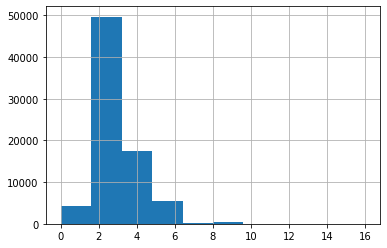

In [35]:
df.bedroomcnt.hist()

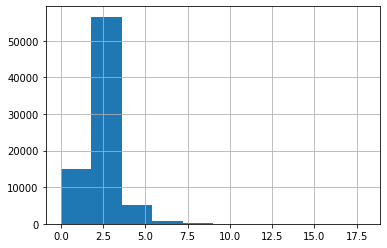

In [37]:
df.bathroomcnt.hist()

In [45]:
# Let's figure out how much data is missing where
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing / rows
    cols_missing = pd.DataFrame({'number_missing_rows': num_missing, 'percent_rows_missing': pct_missing})
    return cols_missing

In [56]:
nulls_by_column = nulls_by_col(df)
nulls_by_column.sort_values(by="percent_rows_missing", ascending=False, inplace=True)
nulls_by_column.head(30)

,number_missing_rows,percent_rows_missing
buildingclassdesc,77565,0.999807
buildingclasstypeid,77565,0.999807
finishedsquarefeet13,77538,0.999459
storytypeid,77530,0.999356
storydesc,77530,0.999356
basementsqft,77530,0.999356
yardbuildingsqft26,77510,0.999098
fireplaceflag,77408,0.997783
architecturalstyletypeid,77373,0.997332
architecturalstyledesc,77373,0.997332


In [61]:
def nulls_by_row(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing 

null_rows = nulls_by_row(df)
null_rows.sort_values(by="pct_cols_missing", ascending=False, inplace=True)
null_rows

,num_cols_missing,pct_cols_missing,num_rows
25,48,68.57142857142857,3
24,47,67.14285714285714,3
23,46,65.71428571428571,5
22,45,64.28571428571429,50
21,44,62.857142857142854,79
20,43,61.42857142857143,29
19,42,60.0,27
18,41,58.57142857142858,29
17,40,57.14285714285714,230
16,39,55.714285714285715,285


In [66]:
df.columns.tolist()

['Unnamed: 0',
 'typeconstructiontypeid',
 'storytypeid',
 'propertylandusetypeid',
 'heatingorsystemtypeid',
 'buildingclasstypeid',
 'architecturalstyletypeid',
 'airconditioningtypeid',
 'parcelid',
 'id',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'num

## Prepare Goals
- How do we define a single unit? No land/lot, duplexes, commercial
- Remove any properties that are likely something other than single unit. 
    - Do not purely filter by unitcnt 
    - Goal is to reduce single units that are falsely removed as something else.
   
- Ideas:
    - filter out 0 bedroom and 0 bathroom properties.
    - room count greater than 1
    - squarefootage more than 400
    - filter by propertylandusetype
        - keep:
            - 260, residential general
            - 261, single family residential
            - 262, rural residence
            - 279 inferred single family residential

In [70]:
df = df[df.propertylandusetypeid.isin([260, 261, 262, 279])]

,Unnamed: 0,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
6,6,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12095076,781532,...,6,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [75]:
# Only retain homes with a positive number of bedrooms and bathrooms
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0)]
df.shape

(52300, 70)

In [77]:
df.unitcnt.value_counts()

1.0    33783
2.0       28
4.0        3
3.0        1
Name: unitcnt, dtype: int64

In [78]:
# 18485 null unit counts. They're probably unit counts of 1.
df.unitcnt.isnull().sum()

18485

In [84]:
df.unitcnt = df.unitcnt.fillna(1.0)
df.shape

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


(52268, 70)

,Unnamed: 0,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
6,6,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12095076,781532,...,6,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77575,77575,NaN,NaN,261.0,2.0,NaN,NaN,NaN,11000655,673515,...,77609,0.020615,2017-09-20,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
77576,77576,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17239384,2968375,...,77610,0.013209,2017-09-21,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
77577,77577,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12773139,1843709,...,77611,0.037129,2017-09-21,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
77578,77578,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12826780,1187175,...,77612,0.007204,2017-09-25,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
